## Use Case / Steps / Ressources


Use case: a company owns a job portal and has many job postings from other companies who wanna hire candidates. An important stakeholder asks for insights regarding data jobs, especially data scientists, data analysts and business intelligence jobs. Your task is to do analysis on these data and feedback insights to the business. 

Basic Steps to perform

- Perform proper analysis on the data 
- Generate Word Cloud 
- Apply NLP standard methods on the data to preprocess it
- Generate Word2Vec embeddings 
- Try similarity functions of the word2vec
- Visiulaize some embeddings 
- implement a streamlit and deploy your application


## Load Data

In [ ]:
import gensim

In [ ]:
import pandas as pd

url = 'https://drive.google.com/file/d/16EGubjXaeDwTH7sc6FnuQj7EI9ZfRYNL/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, sep = '\t')

In [ ]:
df

,Unnamed: 0,job_title,full_description,company,location
0,0,Senior Testmanager/Qualitätsmanager (m/w) Shif...,"Zum weiteren Ausbau unseres Teams, suchen wir ...",NTT DATA Deutschland GmbH,deutschlandweit
1,1,Junior Java Entwickler (m/w) in spannenden Ent...,Erfahrungen im Umgang mit objektorientierten P...,NTT DATA Deutschland GmbH,"Frankfurt a.M., Köln, München, Stuttgart, deut..."
2,2,(Senior)Technical Consultant (m/w) Testautomat...,DBS-8346-SR - Einsatzort: deutschlandweit - Wi...,NTT DATA Deutschland GmbH,deutschlandweit
3,3,Einsteiger (w/m) Digitalisierung und Data Anal...,Die globale EY-Organisation* ist einer der Mar...,Ernst & Young GmbH Wirtschaftsprüfungsgesellsc...,Deutschlandweit
4,4,Projektmanager / Managing Consultant (m/w) Cus...,Idealerweise über drei Jahre praktische Erfahr...,NTT DATA Deutschland GmbH,"Frankfurt a.M., Köln, München, deutschlandweit"
...,...,...,...,...,...
23477,23477,Technischer Fachberater (m/w) im Innendienst,Sie haben eine kaufmännische bzw. technische A...,Rala GmbH & Co. KG,Ludwigshafen
23478,23478,Wirtschaftsingenieur als Referent im Vertrieb ...,Die Deutsche Bahn ist nicht nur einer der wich...,Deutsche Bahn AG,Berlin
23479,23479,IT Fachkraft m/w,"Standort: Heilbad Heiligenstadt (37308), Thüri...",Magna,Heilbad Heiligenstadt
23480,23480,(Junior) Projektingenieur Sensorik und Kommuni...,Für unseren Geschäftsbereich Verteidigung & Si...,IABG Industrieanlagen - Betriebsgesellschaft mbH,"Ottobrunn bei München, Koblenz"


In [ ]:
df.columns

Index(['Unnamed: 0', 'job_title', 'full_description', 'company', 'location'], dtype='object')

In [ ]:
df = df[['job_title', 'full_description', 'company', 'location']]

## Data Exploration

In [ ]:
df.shape

(23482, 4)

In [ ]:
df.head()

,job_title,full_description,company,location
0,Senior Testmanager/Qualitätsmanager (m/w) Shif...,"Zum weiteren Ausbau unseres Teams, suchen wir ...",NTT DATA Deutschland GmbH,deutschlandweit
1,Junior Java Entwickler (m/w) in spannenden Ent...,Erfahrungen im Umgang mit objektorientierten P...,NTT DATA Deutschland GmbH,"Frankfurt a.M., Köln, München, Stuttgart, deut..."
2,(Senior)Technical Consultant (m/w) Testautomat...,DBS-8346-SR - Einsatzort: deutschlandweit - Wi...,NTT DATA Deutschland GmbH,deutschlandweit
3,Einsteiger (w/m) Digitalisierung und Data Anal...,Die globale EY-Organisation* ist einer der Mar...,Ernst & Young GmbH Wirtschaftsprüfungsgesellsc...,Deutschlandweit
4,Projektmanager / Managing Consultant (m/w) Cus...,Idealerweise über drei Jahre praktische Erfahr...,NTT DATA Deutschland GmbH,"Frankfurt a.M., Köln, München, deutschlandweit"


In [ ]:
#from google.colab import files
#df.to_csv('df.csv')
#files.download('df.csv')

In [ ]:
df.isnull().sum()

job_title           0
full_description    0
company             0
location            0
dtype: int64

In [ ]:
#Removing the missing values: Process not necesary because we dont have missing values
#df = df.dropna().reset_index(drop=True)
#df.isnull().sum()

In [ ]:
df[df['job_title'].str.match('Data Scien')]

,job_title,full_description,company,location
23,Data Scientist Cyber-Physical Systems (m/w) Ma...,Spitzenleistung im Team - Mit Pioniergeist und...,SCHUNK GmbH & Co. KG,Brackenheim-Hausen
105,Data Scientist (m/f) for quantitative genetic ...,We are looking to recruit - at the earliest po...,KWS SAAT SE,Einbeck
150,Data Scientist (m/f),"Development of complex, automated data analyti...",QIAGEN GmbH,Hilden
151,Data Scientist (m/w),Jetzt Data Scientist (m/w) Unser international...,ING-DiBa AG,Frankfurt am Main
173,Data Scientist Finance (w/m) / Frankfurt/Main ...,Sie haben ein abgeschlossenes Studium als Bach...,Ernst & Young GmbH Wirtschaftsprüfungsgesellsc...,"Frankfurt, Stuttgart"
...,...,...,...,...
22047,Data Scientist (m/w),Bewerben - Anstellung - Vollzeit - Ort - Duisb...,metapeople GmbH,Duisburg
22059,Data Scientist - Analytic Specialist (w/m) - F...,Die globale EY-Organisation* ist einer der Mar...,Ernst & Young GmbH Wirtschaftsprüfungsgesellsc...,Frankfurt am Main
22096,Data Scientist (m/w),Als LEADER IN DIGITAL TRANS­FOR­MA­TION berate...,Capgemini Consulting,"Frankfurt am Main, Köln, München, Berlin"
22121,Data Scientist and Computational Linguist (m/f),for Reinsurance Development – Analytics Centra...,Münchener Rückversicherungs-Gesellschaft AG,München


There are duplicates that will be removed at the end of preprocessing: 

In [ ]:
df[df.duplicated()]

,job_title,full_description,company,location
601,Web-Entwickler (m/w),Dafür brauchen wir Deine Unterstützung als Web...,DeepL GmbH,Köln
1407,Developer (w/m) SAP MM,Als Developer (w/m) SAP MM gestaltest du Proze...,Lidl Digital International GmbH & Co. KG,"Leingarten, Berlin"
1536,Systemingenieur (m/w),Bei BioNTech leistet jeder Großes! Denn als gr...,BioNTech AG,Mainz
2154,Prüfverfahrensentwickler/-in,Reutlingen * Feste Anstellung * Vollzeit - Wil...,Robert Bosch GmbH,Reutlingen
2197,Produktingenieur Prüfköpfe (m/w),Als Produktingenieur sind Sie für die Umsetzun...,Baker Hughes a GE Company,Hürth
...,...,...,...,...
22463,Elektroingenieur als Bauüberwacher Bahn (w/m),Die Deutsche Bahn ist nicht nur einer der wich...,Deutsche Bahn AG,Nürnberg
22673,Supplier Quality Engineer (m/w),The Supplier Quality Engineer will collaborate...,Baker Hughes a GE Company,Wunstorf
22743,"Ingenieur/in (TU/TH), Master",Für den Dienstort Stuttgart suchen wir einen/e...,BGHM Berufsgenossenschaft Holz und Metall,Stuttgart
22907,Entwicklungsingenieur (m/w) Pfadplanung für au...,Der Bertrandt-Konzern bietet seit über 40 Jahr...,Bertrandt AG,Frankfurt am Main


In [ ]:
df['job_full'] = df.job_title.str.cat(df.full_description, sep =" ")

In [ ]:
df

,job_title,full_description,company,location,job_full
0,Senior Testmanager/Qualitätsmanager (m/w) Shif...,"Zum weiteren Ausbau unseres Teams, suchen wir ...",NTT DATA Deutschland GmbH,deutschlandweit,Senior Testmanager/Qualitätsmanager (m/w) Shif...
1,Junior Java Entwickler (m/w) in spannenden Ent...,Erfahrungen im Umgang mit objektorientierten P...,NTT DATA Deutschland GmbH,"Frankfurt a.M., Köln, München, Stuttgart, deut...",Junior Java Entwickler (m/w) in spannenden Ent...
2,(Senior)Technical Consultant (m/w) Testautomat...,DBS-8346-SR - Einsatzort: deutschlandweit - Wi...,NTT DATA Deutschland GmbH,deutschlandweit,(Senior)Technical Consultant (m/w) Testautomat...
3,Einsteiger (w/m) Digitalisierung und Data Anal...,Die globale EY-Organisation* ist einer der Mar...,Ernst & Young GmbH Wirtschaftsprüfungsgesellsc...,Deutschlandweit,Einsteiger (w/m) Digitalisierung und Data Anal...
4,Projektmanager / Managing Consultant (m/w) Cus...,Idealerweise über drei Jahre praktische Erfahr...,NTT DATA Deutschland GmbH,"Frankfurt a.M., Köln, München, deutschlandweit",Projektmanager / Managing Consultant (m/w) Cus...
...,...,...,...,...,...
23477,Technischer Fachberater (m/w) im Innendienst,Sie haben eine kaufmännische bzw. technische A...,Rala GmbH & Co. KG,Ludwigshafen,Technischer Fachberater (m/w) im Innendienst S...
23478,Wirtschaftsingenieur als Referent im Vertrieb ...,Die Deutsche Bahn ist nicht nur einer der wich...,Deutsche Bahn AG,Berlin,Wirtschaftsingenieur als Referent im Vertrieb ...
23479,IT Fachkraft m/w,"Standort: Heilbad Heiligenstadt (37308), Thüri...",Magna,Heilbad Heiligenstadt,IT Fachkraft m/w Standort: Heilbad Heiligensta...
23480,(Junior) Projektingenieur Sensorik und Kommuni...,Für unseren Geschäftsbereich Verteidigung & Si...,IABG Industrieanlagen - Betriebsgesellschaft mbH,"Ottobrunn bei München, Koblenz",(Junior) Projektingenieur Sensorik und Kommuni...


## Data Preprocessing

In [ ]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

We are lemmatizing and removing the stopwords and non-alphabetic characters for each line of dialogue.

In [ ]:
# https://spacy.io/models/de
from spacy.lang.de.examples import sentences 
import spacy.cli
spacy.cli.download("de_core_news_sm")
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")


## just some example code to understand what sentences does
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Die ganze Stadt ist ein Startup: Shenzhen ist das Silicon Valley für Hardware-Firmen
Die VERB ROOT
ganze NOUN compound
Stadt PROPN dobj
ist ADP dobj
ein PROPN compound
Startup PROPN dobj
: PUNCT punct
Shenzhen PROPN nsubj
ist VERB nmod
das PROPN compound
Silicon PROPN compound
Valley PROPN dobj
für NOUN compound
Hardware PROPN compound
- PUNCT punct
Firmen PROPN nsubj


Lemmatizes and removes stop words: 

In [ ]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

Removes non-alphabetic characters ans makes every word written with lower capitals: 

In [ ]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['job_full'])

Taking advantage of spaCy .pipe() attribute to speed-up the cleaning process and applies the cleaning function as well as the variable brief_cleaning:

In [ ]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 1.92 mins


Put the results in a DataFrame to remove missing values and duplicates:

In [ ]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(23150, 1)

In [ ]:
df_clean.head()

,clean
0,senior testmanager qualit tsmanager m w shift ...
1,junior java entwickler m w spannenden enterpri...
2,senior technical consultant m w testautomati...
3,einsteiger w m digitalisierung und data analyt...
4,projektmanager manage consultant m w customer ...


Adding Bigrams: 

In [ ]:
from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in df_clean['clean']]

In [ ]:
phrases = Phrases(sent, min_count=20, progress_per=10000)

In [ ]:
bigram = Phraser(phrases)

In [ ]:
sentences = bigram[sent]

In [ ]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

31846

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['m', 'w', 'und', 'f_r', 'der', 'die', 'sie', 'al', 'mit', 'wir']

In [ ]:
# Data Science terms list
data_scientist = ['python', 'r', 'sql', 'hadoop', 'spark', 'java', 'tableau', 'analytics'
              'scala', 'aws', 'c', 'c++', 'matlab', 'tensorflow',
              'nosql', 'scikit', 'machine learning', 'statistic',
              'analysis', 'computer science', 'ai', 'deep learning',
              'nlp', 'natural language processing', 'neural network', 'mathematic',
              'database', 'jquery', 'git', 'json',
              'java', 'api', 'analytic', 'empathy', 'collaborate', 'test']

## Model training
Gensim Word2Vec Implementation

In [ ]:
import multiprocessing
from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count()

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=5,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1,
                     sg=1)

###Building the Vocabulary Table

In [ ]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.04 mins


In [ ]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))



Time to train the model: 3.07 mins


In [ ]:
w2v_model.init_sims(replace=True)

## Explore the model
(Most similar)

In [ ]:
w2v_model.wv.vocab["data_scientist"].count

175

In [ ]:
w2v_model.wv.vocab["data_science"].count

65

In [ ]:
w2v_model.wv.most_similar(positive=["data_science", "data_scientist"], topn=10)

[('machine_learn', 0.5126784443855286),
 ('machine_learning', 0.49116313457489014),
 ('data_mining', 0.4613892734050751),
 ('predictive', 0.4574835002422333),
 ('advanced_analytic', 0.45326805114746094),
 ('analytic', 0.45289289951324463),
 ('artificial_intelligence', 0.44095084071159363),
 ('ai', 0.4202194809913635),
 ('datum_analytic', 0.4157238006591797),
 ('datum', 0.41369402408599854)]

In [ ]:
w2v_model.wv.most_similar(positive=["data_science", "data_scientist", "skill", "requirement"], topn=10)

[('machine_learn', 0.4978030025959015),
 ('advanced_analytic', 0.49234214425086975),
 ('strong', 0.48144668340682983),
 ('predictive', 0.479225754737854),
 ('artificial_intelligence', 0.47267836332321167),
 ('machine_learning', 0.4684576988220215),
 ('use', 0.46536749601364136),
 ('different', 0.4617690443992615),
 ('analytic', 0.46013525128364563),
 ('internship', 0.45683473348617554)]

In [ ]:
w2v_model.wv.most_similar(positive=["data_analyst"], topn=10)

[('seo', 0.4062853455543518),
 ('analyst', 0.38921141624450684),
 ('steuerberatung', 0.38635897636413574),
 ('offshore', 0.3732295036315918),
 ('advisory_c', 0.3661351501941681),
 ('auditor', 0.3604670763015747),
 ('statista', 0.35256314277648926),
 ('datum', 0.35002273321151733),
 ('datenbanken', 0.349307656288147),
 ('idea', 0.34754830598831177)]

##Visualizations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re 
import pandas as pd 
from time import time
from collections import defaultdict

####To make the visualizations more relevant, we will look at the relationships 
between a query word (in red), its most similar words in the model (in blue), and other words from the vocabulary (in green).

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

10 Most similar words vs. 8 Random words:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


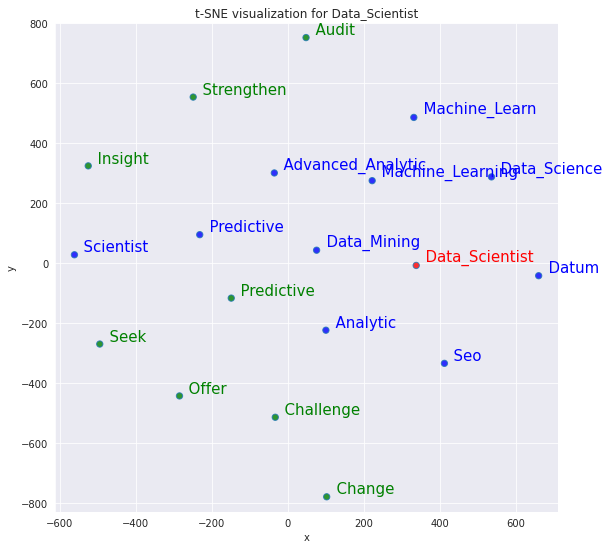

In [ ]:
tsnescatterplot(w2v_model, 'data_scientist', ['predictive', 'offer', 'audit', 'change', 'challenge', 'seek', 'insight', 'strengthen'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


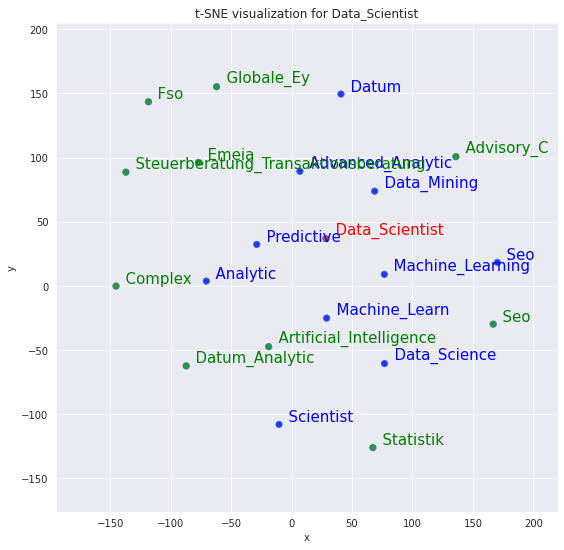

In [ ]:
tsnescatterplot(w2v_model, "data_scientist", [t[0] for t in w2v_model.wv.most_similar(positive=["data_analyst", "data_analytic"], topn=10)])



## Find most wanted skills

In [ ]:
# Data Science terms list
data_scientist = ['predictive', 'python', 'r', 'sql', 'hadoop', 'spark', 'java', 'tableau', 'analytics'
              'scala', 'aws', 'c', 'c++', 'matlab', 'tensorflow', 'deep_learn'
              'nosql', 'scikit', 'machine_learning', 'statistic', 'Statistik'
              'analysis', 'computer science', 'ai','artificial_intelligence', 'deep learning',
              'nlp', 'natural_language_processing', 'neural_network', 'mathematic',
              'database', 'jquery', 'git', 'json',
              'java', 'api', 'analytic', 'empathy', 'collaborate', 'test', 'predictive', 'data_mining',  'reporting', 
              'iot', 'computer_vision', "advanced_analytic", "hybris", "sap_hybris", "machine_learn", "ai", "artificial_intelligence", "advanced_analytic", "machine_learning", "data_mining", "statistik", "big_data",
              "big_datum", "autonomous_driving", "softwaredeveloper", "database", "computer_vision", "bachelor_science", "statistik", "sas" ]

In [ ]:
data_analyst = ['predictive', 'python', 'r', 'sql', 'hadoop', 'spark', 'java', 'tableau', 'analytics'
              'scala', 'aws', 'c', 'c++', 'matlab', 'tensorflow', 'deep_learn'
              'nosql', 'scikit', 'machine_learning', 'statistic', 'Statistik'
              'analysis', 'computer science', 'ai','artificial_intelligence', 'deep learning',
              'nlp', 'natural_language_processing', 'neural_network', 'mathematic',
              'database', 'jquery', 'git', 'json',
              'java', 'api', 'analytic', 'empathy', 'collaborate', 'test', 'predictive', 'data_mining',  'reporting', 
              'iot', 'computer_vision', "advanced_analytic", "hybris", "sap_hybris", "machine_learn", "ai", "artificial_intelligence", "advanced_analytic", "machine_learning", "data_mining", "statistik", "big_data",
              "big_datum", "autonomous_driving", "softwaredeveloper", "database", "computer_vision", "bachelor_science","robotic"
              'java', 'api', 'analytic', 'empathy', 'collaborate', 'test', 'predictive', 'data_mining',  'reporting', 
              'iot', 'computer_vision', "advanced_analytic", "analysis", "report", "research", "seo", "big_datum", "digitalen_transformation", "html_css","kpmg", "big_data", "hybris", "sap_hybris", "busines_intelligence", "sas"]

In [ ]:
business_analyst = ['predictive', 'python', 'r', 'sql', 'hadoop', 'spark', 'java', 'tableau', 'analytics'
              'scala', 'aws', 'c', 'c++', 'matlab', 'tensorflow', 'deep_learn'
              'nosql', 'scikit', 'machine_learning', 'statistic', 'Statistik'
              'analysis', 'computer science', 'ai','artificial_intelligence', 'deep learning',
              'nlp', 'natural_language_processing', 'neural_network', 'mathematic',
              'database', 'jquery', 'git', 'json',
              'java', 'api', 'analytic', 'empathy', 'collaborate', 'test', 'predictive', 'data_mining',  'reporting', 
              'iot', 'computer_vision', "advanced_analytic", "hybris", "sap_hybris", "machine_learn", "ai", "artificial_intelligence", "advanced_analytic", "machine_learning", "data_mining", "statistik", "big_data",
              "big_datum", "autonomous_driving", "softwaredeveloper", "database", "computer_vision", "bachelor_science","robotic"
              'java', 'api', 'analytic', 'empathy', 'collaborate', 'test', 'predictive', 'data_mining',  'reporting', 
              'iot', 'computer_vision', "advanced_analytic", "analysis", "report", "research", "seo", "big_datum", "digitalen_transformation", "html_css","kpmg", "big_data", "hybris", "sap_hybris", "busines_intelligence"
              "datum_warehouse", "projekterfahrung", "data_warehouse", "sap", "mm", "softwaredeveloper", "sap_fi", "etl", "seo", "sap_bw", "datum_analytic", "hybris", "data_analytic", "abap_entwickler", "scrum_master", 
              "java_jee", "scm", "nav", "warehouse", "data_mining", "crm", "user_experience", "sap_hcm", "ui", "abap", "ms_sql", "mdm", "sas"]

In [ ]:
# Calling DataFrame constructor on list
list_most_similar = list(w2v_model.wv.most_similar(positive=["data_science", "data_scientist"], topn=200))

In [ ]:
list_most_similar_bi = list(w2v_model.wv.most_similar(positive=["business_analyst", "business_analysten", "business_intelligence"], topn=200))

In [ ]:
list_most_similar_analyst = list(w2v_model.wv.most_similar(positive=["data_analyst", "data_analytic"], topn=200))

In [ ]:
#list_most_similar

In [ ]:
skills_datascience = []
for item in list_most_similar: 
  if item[0] in data_scientist: 
    skills_datascience.append(item)
skills_datascience

[('machine_learn', 0.5126784443855286),
 ('machine_learning', 0.49116313457489014),
 ('data_mining', 0.4613892734050751),
 ('predictive', 0.4574835002422333),
 ('advanced_analytic', 0.45326805114746094),
 ('analytic', 0.45289289951324463),
 ('artificial_intelligence', 0.44095084071159363),
 ('ai', 0.4202194809913635),
 ('statistik', 0.4095563292503357),
 ('big_datum', 0.38804906606674194),
 ('big_data', 0.3534114360809326),
 ('softwaredeveloper', 0.32471245527267456),
 ('computer_vision', 0.31301766633987427),
 ('database', 0.29915282130241394),
 ('autonomous_driving', 0.2840184271335602),
 ('sas', 0.28109806776046753)]

In [ ]:
skills_analyst = []
for item in list_most_similar_analyst: 
  if item[0] in data_analyst: 
    skills_analyst.append(item)
skills_analyst

[('artificial_intelligence', 0.40064194798469543),
 ('seo', 0.3977927267551422),
 ('statistik', 0.38489797711372375),
 ('analytic', 0.37723875045776367),
 ('data_mining', 0.35933738946914673),
 ('predictive', 0.3593060374259949),
 ('big_datum', 0.3392043709754944),
 ('ai', 0.3313019275665283),
 ('machine_learn', 0.32835254073143005),
 ('report', 0.3201271891593933),
 ('html_css', 0.30558404326438904),
 ('analysis', 0.29967746138572693),
 ('reporting', 0.29588720202445984),
 ('advanced_analytic', 0.2887738347053528),
 ('computer_vision', 0.2814595699310303),
 ('machine_learning', 0.27886781096458435)]

In [ ]:
skills_bi = []
for item in list_most_similar_bi: 
  if item[0] in business_analyst: 
    skills_bi.append(item)
skills_bi

[('data_warehouse', 0.4673776626586914),
 ('analytic', 0.4487149119377136),
 ('sap', 0.4277411699295044),
 ('sap_fi', 0.39597243070602417),
 ('datum_analytic', 0.3897566795349121),
 ('nav', 0.3794471025466919),
 ('java', 0.37354886531829834),
 ('etl', 0.3715692162513733),
 ('scrum_master', 0.3608629107475281),
 ('projekterfahrung', 0.36003488302230835),
 ('seo', 0.3530060648918152),
 ('mm', 0.3489418625831604),
 ('softwaredeveloper', 0.3484516143798828),
 ('ui', 0.3468100428581238),
 ('crm', 0.34386083483695984),
 ('advanced_analytic', 0.3418036699295044),
 ('predictive', 0.3375847637653351),
 ('scm', 0.3317260146141052),
 ('machine_learn', 0.3289346694946289),
 ('hybris', 0.3282107710838318),
 ('abap_entwickler', 0.32498711347579956),
 ('big_datum', 0.3236924409866333),
 ('reporting', 0.32355615496635437),
 ('report', 0.3220048248767853),
 ('data_analytic', 0.32115018367767334),
 ('user_experience', 0.3207763731479645),
 ('sap_bw', 0.3195381462574005),
 ('data_mining', 0.3168238997459

##WORD CLOUD

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

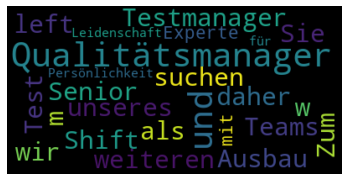

In [ ]:
# Start with one review:
text = df.job_full[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

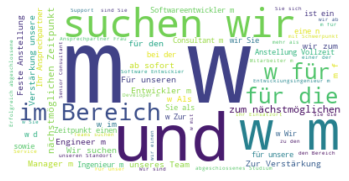

In [ ]:
# for all rows of job_full: 
text = " ".join(review for review in df.job_full)

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()